In [10]:
# 營業收入
import pandas as pd
import json
import os
CUR_DIR = os.getcwd()
FIN_DIR = os.path.join(os.path.dirname(CUR_DIR), "financial_statements")
# 營業收入：pstage => financial_report
df = pd.read_parquet(f"{FIN_DIR}/pstage/financial_report.parquet", engine='pyarrow')
pmart = df[['財務資料日', '證券碼','營業收入淨額', "營業毛利率"]]
pmart.to_parquet(f"{FIN_DIR}/pmart/net_revenue.parquet")

8

In [43]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import os
CUR_DIR = os.getcwd()
FIN_DIR = os.path.join(os.path.dirname(CUR_DIR), "financial_statements")
# 營業收入：pstage => financial_report
df = pd.read_parquet(f"{FIN_DIR}/pstage/financial_report.parquet", engine='pyarrow')
list_ = ["2007","2008","2009"]
pmart = df[['財務資料日', '證券碼', '存貨週轉率(次)', '應收帳款及票據', '營業收入淨額', '存貨']]
filtered_pmart = pmart[pmart['證券碼'].isin(list_)]
filtered_pmart

,財務資料日,證券碼,存貨週轉率(次),應收帳款及票據,營業收入淨額,存貨
13367,2005-06-01,2007,6.23,318870.0,4093312.0,869100.0
13368,2005-12-01,2007,9.30,193722.0,4042089.0,502241.0
13369,2006-06-01,2007,7.90,274782.0,4338033.0,596887.0
13370,2006-12-01,2007,5.68,260225.0,4866538.0,1229462.0
13371,2007-06-01,2007,5.98,237190.0,6493337.0,804547.0
...,...,...,...,...,...,...
13570,2022-12-01,2009,0.30,170862.0,618266.0,1984726.0
13571,2023-03-01,2009,0.31,144527.0,627710.0,1997977.0
13572,2023-06-01,2009,1.36,188900.0,622570.0,1941011.0
13573,2023-09-01,2009,1.40,208413.0,672519.0,1876009.0


13570   2022-12-01
13571   2023-03-01
13572   2023-06-01
13573   2023-09-01
13574   2023-12-01
Name: 財務資料日, dtype: datetime64[ns]


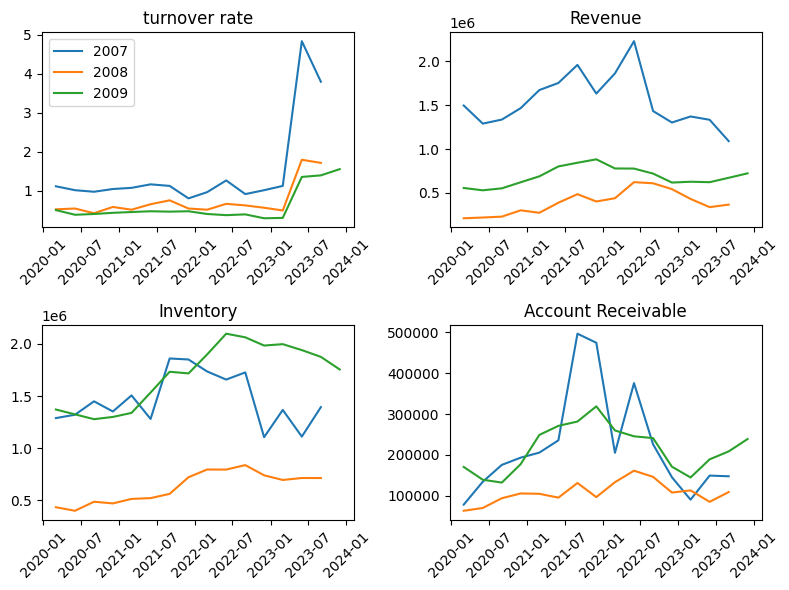

In [38]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
date_col = "財務資料日"
date_start = "2020-01-01"
code_col = "證券碼"
for stock in list_:
    data = filtered_pmart[filtered_pmart[code_col] == stock]
    data = data[data[date_col] >= date_start]
    ax[0, 0].plot(data[date_col], data['存貨週轉率(次)'], label=stock)
    ax[0, 0].set_title("turnover rate")
    ax[0, 0].legend()
    ax[0, 0].tick_params(axis='x', rotation=45)

for stock in list_:
    data = filtered_pmart[filtered_pmart[code_col] == stock]
    data = data[data[date_col] >= date_start]
    ax[0, 1].plot(data[date_col], data['營業收入淨額'], label=stock)
    ax[0, 1].set_title("Revenue")
    ax[0, 1].tick_params(axis='x', rotation=45)
    # ax[0, 1].legend()
for stock in list_:
    data = filtered_pmart[filtered_pmart[code_col] == stock]
    data = data[data[date_col] >= date_start]
    ax[1, 1].plot(data[date_col], data['應收帳款及票據'], label=stock)
    ax[1, 1].set_title("Account Receivable")
    ax[1, 1].tick_params(axis='x', rotation=45)
    # ax[1, 1].legend()

for stock in list_:
    data = filtered_pmart[filtered_pmart[code_col] == stock]
    data = data[data[date_col] >= date_start]
    ax[1, 0].plot(data[date_col], data['存貨'], label=stock)
    ax[1, 0].set_title("Inventory")
    ax[1, 0].tick_params(axis='x', rotation=45)
    # ax[1, 0].legend()

print(data[date_col].tail())
plt.tight_layout()
plt.show()

淨利率；營業現金流 什麼好的情況會導致營業現金流減少？原物料Ｖ；擴廠Ｘ（投資現金流）

IFRS15主理人代理人問題，如果是代工，必須淨額認列，不能任入營業現金流，只能影響到淨利率

13570   2022-12-01
13571   2023-03-01
13572   2023-06-01
13573   2023-09-01
13574   2023-12-01
Name: 財務資料日, dtype: datetime64[ns]


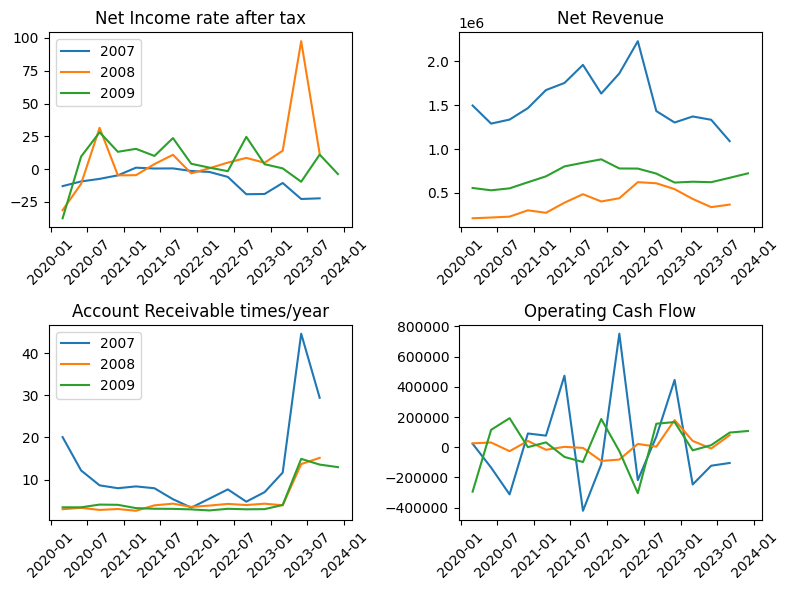

In [42]:
# 營業收入
import pandas as pd
import json
import os
CUR_DIR = os.getcwd()
FIN_DIR = os.path.join(os.path.dirname(CUR_DIR), "financial_statements")
# 營業收入：pstage => financial_report
df = pd.read_parquet(f"{FIN_DIR}/pstage/financial_report.parquet", engine='pyarrow')
pmart = df[['財務資料日', '證券碼','應收帳款週轉次數','營業收入淨額', "稅後淨利率", '來自營運之現金流量']]
pmart.to_parquet(f"{FIN_DIR}/pmart/net_revenue.parquet")

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
date_col = "財務資料日"
date_start = "2020-01-01"
code_col = "證券碼"
filtered_pmart = pmart[pmart['證券碼'].isin(list_)]
filtered_pmart.head()
for stock in list_:
    data = filtered_pmart[filtered_pmart[code_col] == stock]
    data = data[data[date_col] >= date_start]
    ax[0, 0].plot(data[date_col], data['稅後淨利率'], label=stock)
    ax[0, 0].set_title("Net Income rate after tax")
    ax[0, 0].legend()
    ax[0, 0].tick_params(axis='x', rotation=45)
for stock in list_:
    data = filtered_pmart[filtered_pmart[code_col] == stock]
    data = data[data[date_col] >= date_start]
    ax[1, 0].plot(data[date_col], data['應收帳款週轉次數'], label=stock)
    ax[1, 0].set_title("Account Receivable times/year")
    ax[1, 0].legend()
    ax[1, 0].tick_params(axis='x', rotation=45)

for stock in list_:
    data = filtered_pmart[filtered_pmart[code_col] == stock]
    data = data[data[date_col] >= date_start]
    ax[0, 1].plot(data[date_col], data['營業收入淨額'], label=stock)
    ax[0, 1].set_title("Net Revenue")
    ax[0, 1].tick_params(axis='x', rotation=45)
    # ax[0, 1].legend()
for stock in list_:
    data = filtered_pmart[filtered_pmart[code_col] == stock]
    data = data[data[date_col] >= date_start]
    ax[1, 1].plot(data[date_col], data['來自營運之現金流量'], label=stock)
    ax[1, 1].set_title("Operating Cash Flow")
    ax[1, 1].tick_params(axis='x', rotation=45)
    # ax[1, 1].legend()

print(data[date_col].tail())
plt.tight_layout()
plt.show()